In [4]:
!pip install -q scikit-lego
!pip install catboost
!pip install xgboost
!pip install tensorflow_decision_forests

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from sklearn.ensemble import VotingRegressor

from sklearn.model_selection import train_test_split
from sklearn.metrics import median_absolute_error
from sklearn.model_selection import GridSearchCV

from sklearn.ensemble import HistGradientBoostingRegressor, AdaBoostRegressor, ExtraTreesRegressor,RandomForestRegressor,BaggingRegressor

from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVC

import tensorflow as tf
import tensorflow_decision_forests as tfdf
import tensorflow_probability as tfp

import os
import sys
import math
import time
import random
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import lightgbm as lgb
import tensorflow as tf
import missingno as msno
import plotly.express as px
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import matplotlib.colors as mcolors
import tensorflow_probability as tfp

from sklearn.base import clone
from lightgbm import LGBMRegressor
from sklearn.decomposition import PCA
from sklearn.model_selection import KFold
from scipy.spatial.distance import squareform
from sklego.linear_model import LADRegression
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBRegressor, XGBClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.ensemble import HistGradientBoostingRegressor, VotingRegressor
from sklearn.metrics import median_absolute_error, roc_auc_score, roc_curve

import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd

import seaborn as sns
sns.set(style="whitegrid")
import matplotlib.pyplot as plt

from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split,StratifiedKFold
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, log_loss

from sklearn.ensemble import VotingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

!wget https://raw.githubusercontent.com/h4pZ/rose-pine-matplotlib/main/themes/rose-pine-dawn.mplstyle -P /tmp
plt.style.use("/tmp/rose-pine-dawn.mplstyle")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 250.9/250.9 kB 3.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 3.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.3/15.3 MB 13.0 MB/s eta 0:00:00
--2023-12-18 08:51:20--  https://raw.githubusercontent.com/h4pZ/rose-pine-matplotlib/main/themes/rose-pine-dawn.mplstyle
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 40905 (40K) [text/plain]
Saving to: ‘/tmp/rose-pine-dawn.mplstyle’

rose-pine-dawn.mpls 100%[===================>]  39.95K  --.-KB/s    in 0.003s  

2023-12-18 08:51:20 (11.6 MB/s) - ‘/tmp/rose-pine-dawn.mplstyle’ saved [40905/40905]



In [9]:
from google.colab import drive
drive.mount('/content/drive')
!mkdir -p ~/.kaggle
!cp '/content/drive/MyDrive/kaggle.json' ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle competitions download -c playground-series-s3e26
!kaggle datasets download joebeachcapital/cirrhosis-patient-survival-prediction
!unzip -j "cirrhosis-patient-survival-prediction.zip" "cirrhosis.csv" -d ./
!unzip playground-series-s3e26.zip

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
playground-series-s3e26.zip: Skipping, found more recently modified local copy (use --force to force download)
  0% 0.00/11.0k [00:00<?, ?B/s]
100% 11.0k/11.0k [00:00<00:00, 23.6MB/s]
Archive:  cirrhosis-patient-survival-prediction.zip
  inflating: ./cirrhosis.csv         
Archive:  playground-series-s3e26.zip
replace sample_submission.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace test.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace train.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n


### First approach

In [ ]:
train = pd.read_csv('train.csv').drop(columns=['id'],axis=1)
test = pd.read_csv('test.csv').drop("id",axis=1)
sample_submisiion = pd.read_csv('sample_submission.csv')

In [ ]:
def analyze_dataframe(df):
    """
    Analyze a pandas DataFrame and provide a summary of its characteristics.

    Parameters:
    df (pandas.DataFrame): The input DataFrame to analyze.

    Returns:
    None
    """
    print("DataFrame Information:")
    print("----------------------")
    display(df.info(verbose=True, show_counts=True))
    print("\n")

    print("DataFrame Values:")
    print("----------------------")
    display(df.head(5).T)
    print("\n")

    print("DataFrame Description:")
    print("----------------------")
    display(df.describe().T)
    print("\n")

    print("Number of Null Values:")
    print("----------------------")
    display(df.isnull().sum())
    print("\n")

    print("Number of Duplicated Rows:")
    print("--------------------------")
    display(df.duplicated().sum())
    print("\n")

    print("Number of Unique Values:")
    print("------------------------")
    display(df.nunique())
    print("\n")

    print("DataFrame Shape:")
    print("----------------")
    print(f"Rows: {df.shape[0]}, Columns: {df.shape[1]}")

# Usage
analyze_dataframe(train)

In [ ]:
original_df.columns = ['id', 'N_Days', 'Status', 'Drug', 'Age', 'Sex', 'Ascites',
       'Hepatomegaly', 'Spiders', 'Edema', 'Bilirubin', 'Cholesterol',
       'Albumin', 'Copper', 'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets',
       'Prothrombin', 'Stage']

set_frame_style(syn_df.head(),'Synthetically Generated Data\n')

from prettytable import PrettyTable


table = PrettyTable()
table.field_names = ["Features","Unique Values"]
for i in list(syn_df.columns) :
    nunique =syn_df[str(i)].nunique
    table.add_row([i, f"{nunique()}"])
print('Unique values in synthetically generated dataset : \n')
print(table)

df = pd.concat([syn_df,original_df], axis =0)

df = df.dropna()
df = df.sample(frac = 1).reset_index(drop = True)
df.info()

In [ ]:
def convert_days_to_years(age_in_days):
    days_in_year = 365.25
    age_in_years = age_in_days / days_in_year
    return age_in_years


def add_cols(df):
        age = list(df.Age)
        age_in_year = []
        for i in age :
            age_in_year.append(int(convert_days_to_years(i)))
        df['Age_in_year'] = pd.Series(age_in_year)
        return df
df = add_cols(df)
original_df = add_cols(original_df)
set_frame_style(df.head())

threshold_platelets = 150
df['thrombocytopenia'] = np.where(df['Platelets'] < threshold_platelets, 1, 0)
test_df['thrombocytopenia'] = np.where(test_df['Platelets'] < threshold_platelets, 1, 0)

threshold_alk_phos_upper = 147  # Upper limit of normal range
threshold_alk_phos_lower = 44   # Lower limit of normal range

df['elevated_alk_phos'] = np.where((df['Alk_Phos'] > threshold_alk_phos_upper) | (df['Alk_Phos'] < threshold_alk_phos_lower), 1, 0)
test_df['elevated_alk_phos'] = np.where((test_df['Alk_Phos'] > threshold_alk_phos_upper) | (test_df['Alk_Phos'] < threshold_alk_phos_lower), 1, 0)

normal_copper_range = (62, 140)

df['normal_copper'] = np.where((df['Copper'] >= normal_copper_range[0]) & (df['Copper'] <= normal_copper_range[1]), 1, 0)
test_df['normal_copper'] = np.where((test_df['Copper'] >= normal_copper_range[0]) & (test_df['Copper'] <= normal_copper_range[1]), 1, 0)

normal_albumin_range = (3.4, 5.4)

df['normal_albumin'] = np.where((df['Albumin'] >= normal_albumin_range[0]) & (df['Albumin'] <= normal_albumin_range[1]), 1, 0)

test_df['normal_albumin'] = np.where((test_df['Albumin'] >= normal_albumin_range[0]) & (test_df['Albumin'] <= normal_albumin_range[1]), 1, 0)


normal_bilirubin_range = (0.2, 1.2)

df['normal_bilirubin'] = np.where((df['Bilirubin'] >= normal_bilirubin_range[0]) & (df['Bilirubin'] <= normal_bilirubin_range[1]), 1, 0)
test_df['normal_bilirubin'] = np.where((test_df['Bilirubin'] >= normal_bilirubin_range[0]) & (test_df['Bilirubin'] <= normal_bilirubin_range[1]), 1, 0)

In [ ]:
numeric_cols= ['N_Days',  'Age',  'Bilirubin', 'Cholesterol', 'Albumin', 'Copper',
       'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin']
test_to_scale = test_df[numeric_cols]
train_to_scale = df[numeric_cols]
set_frame_style(train_to_scale.head(), 'Features with continuous values')
train_to_scale_original = original_df[numeric_cols]

In [ ]:
from plotly.subplots import make_subplots
import random
import plotly.graph_objects as go
columns = list(train_to_scale.columns)

ultra_light_colors = [
"#F0F8FF", "#F6F6F6", "#F0FFF0",  "#FAFAD2",  "#FFE4E1",  "#FFF5EE", "#F5FFFA",  "#F0FFFF","#FFFAF0",  "#F8F8FF"
]
fig = make_subplots(rows=len(columns), cols=2)
count = 0
for row in range(int(len(columns))) :
    random_col = f"RGB({random.randint(100, 255)}, {random.randint(100, 255)}, {random.randint(150, 255)})"
    fig.add_trace(go.Violin(y=syn_df[numeric_cols][columns[count]], x0 = columns[count], box_visible=True, line_color='black',
                               meanline_visible=True, fillcolor=random_col, opacity=0.6,), row=row + 1, col= 1)
    fig.add_trace(go.Violin(y= train_to_scale_original[columns[count]],x0 = columns[count], box_visible=True, line_color='black',
                               meanline_visible=True, fillcolor=random_col, opacity=0.6,), row=row + 1, col= 2)


    count +=1


fig.update_layout(height=2600, width=1000, title_text="Feature Distribution in Synthetic (Left) vs Original Dataset (Right)",showlegend=False,paper_bgcolor= '#F5F5F5')
fig.show()

In [ ]:
set_frame_style(pd.DataFrame(df.Status.value_counts()), 'Data points per class', '15px')

classes = list(df.Status.unique())

ultra_light_colors = [
"#F0F8FF", "#F6F6F6", "#F0FFF0",  "#FAFAD2",  "#FFE4E1",  "#FFF5EE", "#F5FFFA",  "#F0FFFF","#FFFAF0",  "#F8F8FF"
]
def col_per_class(col):
    fig = go.Figure()
    for clas in classes :
        fig.add_trace(go.Violin(y = df[col][df['Status']== clas],   box_visible=True,
                            meanline_visible=True , x = df['Status'][df['Status'] == clas], name = clas ))
        fig.update_layout(title = f'Distribution for {col} for each class', plot_bgcolor = ultra_light_colors[np.random.randint(1,10)],paper_bgcolor= '#F5F5F5', height=400,
        width=1000 )
    return fig
for i in train_to_scale :
    fig = col_per_class(i)
    fig.show()

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = train_to_scale.corr()

# Create a heatmap with masked upper triangle
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='Blues', fmt='.2f', linewidths=.5)
plt.title('Correlation Matrix (Lower Triangle)')
plt.show()

In [ ]:
set_frame_style(df.head())

from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler()


scaled_train = pd.DataFrame(sc.fit_transform(train_to_scale),columns = train_to_scale.columns)
scaled_test = pd.DataFrame(sc.transform(test_to_scale),columns = test_to_scale.columns)

set_frame_style(scaled_train.head())

In [ ]:
train_ohe = df.drop(numeric_cols, axis =1)
train_to_ohe = train_ohe.drop(['id','Age_in_year','Status'], axis =1)
test_ohe = test_df.drop(numeric_cols, axis =1)
test_to_ohe = test_ohe.drop(['id'],axis =1)
set_frame_style(train_to_ohe.head())

set_frame_style(test_to_ohe.head())

In [ ]:
ohe_train = pd.get_dummies(train_to_ohe, columns =train_to_ohe.columns )
ohe_test  = pd.get_dummies(test_to_ohe, columns = train_to_ohe.columns)
ohe_train = ohe_train.replace({True: 1, False: 0})
ohe_test = ohe_test.replace({True: 1, False: 0})
set_frame_style(ohe_train.head())

In [ ]:
train_df_1 = pd.concat([ohe_train, scaled_train], axis =1)
test_df = pd.concat([ohe_test, scaled_test], axis =1)
set_frame_style(train_df_1.head())

In [ ]:
train_df_1.info()

train_df_1.shape

In [ ]:
import xgboost as xgb
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier
from sklearn.metrics import log_loss

X = train_df_1
y = df['Status']

# Label encode target variable
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)



# X, y_encoded = tomek_links(X, y_encoded)

#XGBoost parameters
xgb_params = {'max_depth': 6,
          'min_child_weight': 10,
          'learning_rate': 0.010009541152584345,
          'n_estimators': 1878, 'subsample': 0.47524425009347593,
          'colsample_bytree': 0.3292032860985591, 'random_state': 42,

         'tree_method': 'hist',
        'eval_metric': 'mlogloss',
          'device' : 'cuda',
        'verbosity': 2}

# xgb_params = {'max_depth': 5,
#  'min_child_weight': 8,
#  'learning_rate': 0.10450346600896168,
#  'n_estimators': 225,
#  'subsample': 0.5855025206558809,
#  'colsample_bytree': 0.14926372575849994,
#  'reg_alpha': 0.7621405624015435,
#  'reg_lambda': 0.6443164876665903,
#          'tree_method': 'hist',
#         'eval_metric': 'mlogloss',
#           'device' : 'cuda',
#         'verbosity': 2,
#  'random_state': 42}

# xgb_params ={'max_depth': 10,
#          'min_child_weight': 7,
#          'learning_rate': 0.03419253503641095,
#          'n_estimators': 472,
#          'subsample': 0.8843005833909504,
#          'colsample_bytree': 0.0966352677605082,
#          'random_state': 42,
#          'tree_method': 'hist',
#         'eval_metric': 'mlogloss',
#           'device' : 'cuda',
#         'verbosity': 2, }

# xgb_params ={'max_depth': 8,
#  'min_child_weight': 1,
#  'learning_rate': 0.04242597466435193,
#  'n_estimators': 686,
#  'subsample': 0.5999261787239216,
#  'colsample_bytree': 0.055073941529892194,
#  'random_state': 42,
# 'tree_method': 'hist',
#         'eval_metric': 'mlogloss',
#           'device' : 'cuda',
#         'verbosity': 2,}

# xgb_params = {
#     'max_depth': 8,
#     'min_child_weight': 6,
#     'learning_rate': 0.013401933024622273,
#     'n_estimators': 1472,
#     'subsample': 0.281863681376234,
#     'colsample_bytree': 0.15983733796975869,
#     'random_state': 42,
#     'tree_method': 'hist',
#         'eval_metric': 'mlogloss',
#           'device' : 'cuda',
#         'verbosity': 2,
# }

# number of folds
n_splits = 10

#  StratifiedKFold
stratkf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

#  cross-validation results
cv_results = []

# stratified k-fold cross-validation
for fold, (train_idx, val_idx) in enumerate(stratkf.split(X, y_encoded)):
    X_train, X_val = X.iloc[train_idx], X.iloc[val_idx]
    y_train, y_val = y_encoded[train_idx], y_encoded[val_idx]


    # XGBoost model
    xgb_model = XGBClassifier(**xgb_params )

    xgb_model.fit(X_train, y_train )

    # predictions on the validation set
    y_val_pred_prob = xgb_model.predict_proba(X_val)

    # Evaluating the model
    logloss = log_loss(y_val, y_val_pred_prob)
    print(f'Fold {fold + 1}, Logarithmic Loss on Validation Set: {logloss}')

    # results
    cv_results.append(logloss)

# average cross-validation result
average_cv_result = sum(cv_results) / n_splits
print(f'\nAverage Logarithmic Loss across {n_splits} folds: {average_cv_result}')


In [ ]:
import matplotlib.pyplot as plt
feature_importances = xgb_model.feature_importances_
feature_names = train_df_1.columns
feature_importance_dict = dict(zip(feature_names, feature_importances))
sorted_feature_importance = sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)
sorted_feature_names, sorted_importance_scores = zip(*sorted_feature_importance)
plt.figure(figsize=(10, 10))

plt.barh(sorted_feature_names, sorted_importance_scores)
plt.xlabel("Feature Importance")
plt.ylabel("Feature Name")
plt.title("Feature Importance")
plt.show()

In [ ]:
import lightgbm as lgb
from sklearn.metrics import log_loss
from lightgbm import LGBMClassifier

# parameters
# lgbm_params = {
# 'n_estimators': 479,
#  'learning_rate': 0.011780201673685327,
#  'min_child_weight': 3.100349976889409,
#  'subsample': 0.4975668919008305,
#  'subsample_freq': 0,
#  'colsample_bytree': 0.3960164652068705,
#     'random_state': 42,
#     'objective': 'multiclass',
#     'num_class': 3,  # Number of classes in your target variable
#     'metric': 'multi_logloss',
#     'device': 'gpu',
#     'verbosity': 0
# }
lgbm_params = {'objective': 'multi_logloss',
               'max_depth': 9, 'min_child_samples': 14,
               'learning_rate': 0.034869481921747415,
               'n_estimators': 274, 'min_child_weight': 9,
               'subsample': 0.7717873512945741,
               'colsample_bytree': 0.1702910221565107,
               'reg_alpha': 0.10626128775335533,
               'reg_lambda': 0.624196407787772,
               'random_state': 42,


              }


# folds
n_splits = 10

# StratifiedKFold
stratkf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

cv_results = []



for fold, (train_idx, val_idx) in enumerate(stratkf.split(X, y_encoded)):

    X_train, X_val = X.iloc[train_idx], X.iloc[val_idx]
    y_train, y_val = y_encoded[train_idx], y_encoded[val_idx]

    lgbm_model = LGBMClassifier(**lgbm_params)
    lgbm_model.fit(X_train,y_train)

    y_val_pred_prob = lgbm_model.predict_proba(X_val)

    logloss = log_loss(y_val, y_val_pred_prob)
    print(f'Fold {fold + 1}, Logarithmic Loss on Validation Set: {logloss}')

    cv_results.append(logloss)
average_cv_result = sum(cv_results) / n_splits
print(f'\nAverage Logarithmic Loss across {n_splits} folds: {average_cv_result}')

In [ ]:
from catboost import CatBoostClassifier
catboost_params = {'iterations': 469,
                   'depth': 20,
                   'min_data_in_leaf': 11,
                   'learning_rate': 0.13812945166006543,
                   'grow_policy': 'Lossguide',
                   'bootstrap_type' : 'Bernoulli'}

n_splits = 10

stratkf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)


cv_results = []

In [ ]:
for fold, (train_idx, val_idx) in enumerate(stratkf.split(X, y_encoded)):
    X_train, X_val = X.iloc[train_idx], X.iloc[val_idx]
    y_train, y_val = y_encoded[train_idx], y_encoded[val_idx]

    cat_model = CatBoostClassifier(**catboost_params,
                            random_state=42, verbose =0
                           )
    cat_model.fit(X_train,y_train)


    y_val_pred_prob = cat_model.predict_proba(X_val)

    logloss = log_loss(y_val, y_val_pred_prob)
    print(f'Fold {fold + 1}, Logarithmic Loss on Validation Set: {logloss}')


    cv_results.append(logloss)

average_cv_result = sum(cv_results) / n_splits
print(f'\nAverage Logarithmic Loss across {n_splits} folds: {average_cv_result}')

In [ ]:
from sklearn.ensemble import VotingClassifier


# lgb_1 = LGBMClassifier(**lgbm_params )
# xgb_1 = XGBClassifier(**xgb_params )
# cb_1 = CatBoostClassifier(**catboost_params, random_state=42)
Ensemble = VotingClassifier(estimators = [('lgb', lgbm_model), ('xgb', xgb_model), ('CB', cat_model)],
                            voting='soft',
                            weights = [0.45,0.5,0.05]   #Adjust weighting since XGB performs better in local environment
                            )
Ensemble.fit(X, y_encoded)

In [ ]:
import matplotlib.pyplot as plt
feature_importances = xgb_model.feature_importances_
feature_names = train_df_1.columns
feature_importance_dict = dict(zip(feature_names, feature_importances))
sorted_feature_importance = sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)
sorted_feature_names, sorted_importance_scores = zip(*sorted_feature_importance)
plt.figure(figsize=(10, 10))

plt.barh(sorted_feature_names, sorted_importance_scores)
plt.xlabel("Feature Importance")
plt.ylabel("Feature Name")
plt.title("Feature Importance")
plt.show()

test_df.info()

In [ ]:
y_pred = Ensemble.predict_proba(test_df)
y_pred = pd.DataFrame(y_pred)
y_pred.columns = ['Status_C', 'Status_CL','Status_D']
y_pred.head()

submission_df = pd.DataFrame()
submission_df = y_pred
submission_df['id'] = ids
submission_df.head()

submission_df.to_csv('submission.csv', index= False)

### Second approach

In [ ]:
sub = pd.read_csv('sample_submission.csv')
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7905 entries, 0 to 7904
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             7905 non-null   int64  
 1   N_Days         7905 non-null   int64  
 2   Drug           7905 non-null   object 
 3   Age            7905 non-null   int64  
 4   Sex            7905 non-null   object 
 5   Ascites        7905 non-null   object 
 6   Hepatomegaly   7905 non-null   object 
 7   Spiders        7905 non-null   object 
 8   Edema          7905 non-null   object 
 9   Bilirubin      7905 non-null   float64
 10  Cholesterol    7905 non-null   float64
 11  Albumin        7905 non-null   float64
 12  Copper         7905 non-null   float64
 13  Alk_Phos       7905 non-null   float64
 14  SGOT           7905 non-null   float64
 15  Tryglicerides  7905 non-null   float64
 16  Platelets      7905 non-null   float64
 17  Prothrombin    7905 non-null   float64
 18  Stage   

In [ ]:
train = train.drop('id', axis = 1)
test = test.drop('id', axis = 1)

print(train.isna().sum().any(),  test.isna().sum().any())

total = pd.concat([train.drop('Status', axis=1), test], axis = 0)
total.duplicated().sum()

False False


0

In [ ]:
train[train.columns].nunique().sort_values(ascending=True)

Drug               2
Sex                2
Ascites            2
Hepatomegaly       2
Spiders            2
Status             3
Edema              3
Stage              4
Prothrombin       49
Bilirubin        111
Tryglicerides    154
Albumin          160
Copper           171
SGOT             206
Cholesterol      226
Platelets        227
Alk_Phos         364
Age              391
N_Days           461
dtype: int64

In [ ]:
num_train = train.select_dtypes(include = ['int', 'float'])
num_train.head()

In [ ]:
#plot the numerical data
rows = (len(num_train.columns)+1)//2
_, axes = plt.subplots(rows, 2, figsize = (8, rows*4))
for i, col in enumerate(num_train.columns):
    hor = i%2
    ver = i//2
    sns.histplot(data = num_train[col], kde = True, ax = axes[ver, hor])

In [ ]:
#Extract the categorical features
cat_train = train.select_dtypes(include = ['object']).astype('category')
cat_train.head()

In [ ]:
#plot the categorical data
rows = (len(cat_train.columns)+1)//2
_, axes = plt.subplots(rows, 2, figsize = (8, rows*4))
for i, col in enumerate(cat_train.columns):
    hor = i%2
    ver = i//2
    sns.histplot(data = cat_train[col], ax = axes[ver, hor])

In [ ]:
train_eng = train.copy()
test_eng = test.copy()

In [ ]:
#Feature engineering for categorical features
def col_transform (df:pd.DataFrame):
    df_trans  = df.copy()
    #apply manual transformation for bionomial features
    for col in df.select_dtypes(include=['object']):
        if df_trans[col].nunique() <3 and (col != 'Sex'):
            if col == 'Drug':
                df_trans[col] = df_trans[col].map({'D-penicillamine': True, 'Placebo': False}).astype('bool')
            else:
                df_trans[col] = df_trans[col].map({'Y': True, 'N': False}).astype('bool')
        else:
            #apply one hot encoding for others
            df_trans = pd.concat([df_trans, pd.get_dummies(df_trans[col], prefix = col)], axis = 1)
            df_trans = df_trans.drop(col, axis = 1)
    return df_trans

In [ ]:
train_eng1 =col_transform(train_eng)
print(train_eng1)

#Apply PowerTransformer for a normalized like distribution
from sklearn.preprocessing import PowerTransformer
num_train3 = num_train.copy()

transformer = PowerTransformer(method = 'yeo-johnson')

num_train3 = transformer.fit_transform(num_train3)

num_train3 = pd.DataFrame(num_train3, columns = num_train.columns)
num_train3

In [ ]:
rows = (len(num_train3.columns)+1)//2
_, axes = plt.subplots(rows, 2, figsize = (8, rows*4))
for i, col in enumerate(num_train3.columns):
    hor = i%2
    ver = i//2
    sns.histplot(data = num_train3[col], ax = axes[ver, hor])

In [ ]:
train_engineered = pd.concat([num_train3, train_eng1.drop(num_train3.columns, axis = 1)], axis = 1)
train_engineered.head()

In [ ]:
num_test = test_eng.select_dtypes(include=['int', 'float'])
test_eng1 = col_transform(test_eng)
num_test1 = pd.DataFrame(transformer.transform(num_test), columns = num_test.columns)
test_engineered = pd.concat([num_test1, test_eng1.drop(num_test1.columns, axis = 1)], axis = 1)
test_engineered.head()

In [ ]:
from sklearn.preprocessing import LabelEncoder
coder = LabelEncoder()
y = coder.fit_transform (train.Status)


X = train_engineered.drop(['Status_C', 'Status_CL', 'Status_D'] ,axis = 1)

y

In [ ]:
# Baseline model building

from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
import lightgbm as lgb
from lightgbm import LGBMClassifier
from sklearn.metrics import log_loss
from sklearn.model_selection import cross_val_score
lgbmodel = LGBMClassifier(random_state=42, num_class = 3)

lgbmodel.fit(X, y)

pred = lgbmodel.predict_proba(X)
log_loss(y, pred)

print ("CV score of LGBM is ", abs(cross_val_score(lgbmodel, X, y, cv = 4, scoring='neg_log_loss').mean()))

rfmodel = RandomForestClassifier(criterion = 'log_loss', random_state=42)
print ("CV score of RFmodel is ", abs(cross_val_score(rfmodel, X, y, cv = 4, scoring='neg_log_loss').mean()))
xgbmodel = XGBClassifier(random_state=42)
print ("CV score of xgbmodel is ", abs(cross_val_score(xgbmodel, X, y, cv = 4, scoring='neg_log_loss').mean()))

### Third approach

In [ ]:
import sklearn
import numpy as np
import os
import datetime
import pandas as pd
import matplotlib.pyplot as plt
import missingno as msno
from prettytable import PrettyTable
%matplotlib inline
import seaborn as sns
sns.set(style='darkgrid', font_scale=1.4)
from tqdm import tqdm
from tqdm.notebook import tqdm as tqdm_notebook
tqdm_notebook.get_lock().locks = []
# !pip install sweetviz
# import sweetviz as sv
import concurrent.futures
from copy import deepcopy
from functools import partial
from itertools import combinations
import random
from random import randint, uniform
import gc
from sklearn.feature_selection import f_classif
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler,PowerTransformer, FunctionTransformer
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from itertools import combinations
from sklearn.impute import SimpleImputer
import xgboost as xg
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import mean_squared_error,mean_squared_log_error, roc_auc_score, accuracy_score, f1_score, precision_recall_curve, log_loss
from sklearn.cluster import KMeans
!pip install yellowbrick
from yellowbrick.cluster import KElbowVisualizer
!pip install gap-stat
from gap_statistic.optimalK import OptimalK
from scipy import stats
import statsmodels.api as sm
from scipy.stats import ttest_ind
from scipy.stats import boxcox
import math
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.base import BaseEstimator, TransformerMixin
!pip install optuna
import optuna
!pip install cmaes
import cmaes
import xgboost as xgb
!pip install catboost
!pip install lightgbm --install-option=--gpu --install-option="--boost-root=C:/local/boost_1_69_0" --install-option="--boost-librarydir=C:/local/boost_1_69_0/lib64-msvc-14.1"
import lightgbm as lgb
!pip install category_encoders
from category_encoders import OneHotEncoder, OrdinalEncoder, CountEncoder, CatBoostEncoder
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import StratifiedKFold, KFold
from sklearn.ensemble import RandomForestClassifier, HistGradientBoostingClassifier, GradientBoostingClassifier,ExtraTreesClassifier, AdaBoostClassifier
!pip install -U imbalanced-learn
from imblearn.ensemble import BalancedRandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.naive_bayes import GaussianNB
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from catboost import CatBoost, CatBoostRegressor, CatBoostClassifier
from sklearn.svm import NuSVC, SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.impute import KNNImputer
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from catboost import Pool
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.decomposition import TruncatedSVD

# Suppress warnings
import warnings
warnings.filterwarnings("ignore")
pd.pandas.set_option('display.max_columns',None)

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for gap-stat: filename=gap_stat-2.0.3-py3-none-any.whl size=6133 sha256=fe5b69cec7c2c37d8b84d1609ee3cd4f6d26133233ba09f5a0de973d0aafab73
  Stored in directory: /root/.cache/pip/wheels/e6/75/de/ee29b366258cdeccdacaff94d895b9d2ffc95a486f3b982441
Successfully built gap-stat
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 413.4/413.4 kB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 230.6/230.6 kB 18.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 7.0 MB/s eta 0:00:00

Usage:   
  pip3 install [options] <requirement specifier> [package-index-options] ...
  pip3 install [options] -r <requirements file> [package-index-options] ...
  pip3 install [options] [-e] <vcs project ur

/usr/local/lib/python3.10/dist-packages/sklearn/experimental/enable_hist_gradient_boosting.py:16: UserWarning: Since version 1.0, it is not needed to import enable_hist_gradient_boosting anymore. HistGradientBoostingClassifier and HistGradientBoostingRegressor are now stable and can be normally imported from sklearn.ensemble.
  warnings.warn(


In [ ]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')
original=pd.read_csv("cirrhosis.csv")

train.drop(columns=["id"],inplace=True)
test.drop(columns=["id"],inplace=True)
original.drop(columns=["ID"],inplace=True)

train_copy=train.copy()
test_copy=test.copy()
original_copy=original.copy()

# cols=[f for f in train.columns if train[f].isna().sum()==0 and original[f].isna().sum()>0]
# original=original.loc[original[cols].dropna().index.tolist()]
# print(original.shape)

original["original"]=1

train["original"]=0
test["original"]=0

train=pd.concat([train,original],axis=0)
train.reset_index(inplace=True,drop=True)

target='Status'

train.head()

In [ ]:
table = PrettyTable()

table.field_names = ['Feature', 'Data Type', 'Train Missing %', 'Test Missing %',"Original Missing%"]
for column in train_copy.columns:
    data_type = str(train_copy[column].dtype)
    non_null_count_train= np.round(100-train_copy[column].count()/train_copy.shape[0]*100,1)
    if column!=target:
        non_null_count_test = np.round(100-test_copy[column].count()/test_copy.shape[0]*100,1)
    else:
        non_null_count_test="NA"
    non_null_count_orig= np.round(100-original_copy[column].count()/original_copy.shape[0]*100,1)
    table.add_row([column, data_type, non_null_count_train,non_null_count_test,non_null_count_orig])
print(table)

In [ ]:
def plot_pie_chart(data, title, ax):
    data_counts = data[target].value_counts()
    labels = data_counts.index
    sizes = data_counts.values
    colors = [(0.8, 0.56, 0.65), 'crimson',  (0.99, 0.8, 0.3)]
    explode = (0.1, 0, 0)

    ax.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
    ax.axis('equal')
    ax.set_title(title)

fig, axes = plt.subplots(1, 2, figsize=(18, 6))  # Create three subplots in a row

plot_pie_chart(train, "Train Target Distribution", axes[0])
plot_pie_chart(original, "Original Target Distribution", axes[1])

plt.tight_layout()
plt.show()

In [ ]:
cont_cols = [f for f in train.columns if train[f].dtype != 'O' and train[f].nunique() > 2]
n_rows = len(cont_cols)
fig, axs = plt.subplots(n_rows, 2, figsize=(12, 4 * n_rows))
sns.set_palette([(0.8, 0.56, 0.65), 'crimson',  (0.99, 0.8, 0.3)])

for i, col in enumerate(cont_cols):
    sns.violinplot(x=target, y=col, data=train_copy, ax=axs[i, 0])
    axs[i, 0].set_title(f'{col.title()} Distribution by Target (Train)', fontsize=14)
    axs[i, 0].set_xlabel('outcome', fontsize=12)
    axs[i, 0].set_ylabel(col.title(), fontsize=12)
    sns.despine()

    sns.violinplot(x=target, y=col, data=original, ax=axs[i, 1])
    axs[i, 1].set_title(f'{col.title()} Distribution by Target (Original)', fontsize=12)
    axs[i, 1].set_xlabel('outcome', fontsize=12)
    axs[i, 1].set_ylabel(col.title(), fontsize=12)
    sns.despine()

fig.tight_layout()

plt.show()

In [ ]:
cat_cols = [f for f in train.columns if (train[f].dtype != 'O' and train[f].nunique() / train.shape[0] < 0.025) or (train[f].dtype == 'O' and f not in [target]) ]
custom_palette =(0.8, 0.56, 0.65), 'crimson',  (0.99, 0.8, 0.3)
for col in cat_cols:
    contingency_table = pd.crosstab(train[col], train[target], normalize='index')
    sns.set(style="whitegrid")
    contingency_table.plot(kind="bar", stacked=True, color=custom_palette,figsize=(20, 4))
    plt.title(f"Percentage Distribution of Target across {col}")
    plt.xlabel(col)
    plt.ylabel("Percentage")
    plt.legend(title="Target Class")
    plt.show()

In [ ]:
missing_cat=[f for f in train.columns if train[f].dtype=="O" and train[f].isna().sum()>0]
train_missing_pct = train[missing_cat].isnull().mean() * 100
test_missing_pct = test[missing_cat].isnull().mean() * 100

missing_pct_df = pd.concat([train_missing_pct, test_missing_pct], axis=1, keys=['Train %', 'Test%'])
print(missing_pct_df)

In [ ]:
cat_params={
            'depth': 6,
            'learning_rate': 0.1,
            'l2_leaf_reg': 0.7,
            'random_strength': 0.2,
            'max_bin': 200,
            'od_wait': 65,
            'one_hot_max_size': 70,
            'grow_policy': 'Depthwise',
            'bootstrap_type': 'Bayesian',
            'od_type': 'Iter',
            'eval_metric': 'MultiClass',
            'loss_function': 'MultiClass',
}
def store_missing_rows(df, features):
    missing_rows = {}

    for feature in features:
        missing_rows[feature] = df[df[feature].isnull()]

    return missing_rows

def fill_missing_categorical(train, test, target, features, max_iterations=10):
    df = pd.concat([train.drop(columns=target), test], axis="rows")
    df = df.reset_index(drop=True)

    # Step 1: Store the instances with missing values in each feature
    missing_rows = store_missing_rows(df, features)

    # Step 2: Initially fill all missing values with "Missing"
    for f in features:
        df[f] = df[f].fillna("Missing_" + f)

    for iteration in tqdm(range(max_iterations), desc="Iterations"):
        for feature in features:
            # Skip features with no missing values
            rows_miss = missing_rows[feature].index

            missing_temp = df.loc[rows_miss].copy()
            non_missing_temp = df.drop(index=rows_miss).copy()
            missing_temp = missing_temp.drop(columns=[feature])

            other_features = [x for x in df.columns if x != feature and df[x].dtype == "O"]

            X_train = non_missing_temp.drop(columns=[feature])
            y_train = non_missing_temp[[feature]]

            catboost_classifier = CatBoostClassifier(**cat_params)
            catboost_classifier.fit(X_train, y_train, cat_features=other_features, verbose=False)

            # Step 4: Predict missing values for the feature and update all N features
            y_pred = catboost_classifier.predict(missing_temp)

            # Convert y_pred to strings if necessary
            if y_pred.dtype != "O":
                y_pred = y_pred.astype(str)

            df.loc[rows_miss, feature] = y_pred

    train[features] = np.array(df.iloc[:train.shape[0]][features])
    test[features] = np.array(df.iloc[train.shape[0]:][features])

    return train, test

train, test = fill_missing_categorical(train, test, target, missing_cat, 5)

In [ ]:
missing_num=[f for f in train.columns if train[f].dtype!="O" and train[f].isna().sum()>0]
train_missing_pct = train[missing_num].isnull().mean() * 100
test_missing_pct = test[missing_num].isnull().mean() * 100
missing_pct_df = pd.concat([train_missing_pct, test_missing_pct], axis=1, keys=['Train %', 'Test%'])
print(missing_pct_df)

In [ ]:
cb_params = {
            'iterations': 500,
            'depth': 6,
            'learning_rate': 0.02,
            'l2_leaf_reg': 0.5,
            'random_strength': 0.2,
            'max_bin': 150,
            'od_wait': 80,
            'one_hot_max_size': 70,
            'grow_policy': 'Depthwise',
            'bootstrap_type': 'Bayesian',
            'od_type': 'IncToDec',
            'eval_metric': 'RMSE',
            'loss_function': 'RMSE',
            'random_state': 42,
        }
lgb_params = {
            'n_estimators': 50,
            'max_depth': 8,
            'learning_rate': 0.02,
            'subsample': 0.20,
            'colsample_bytree': 0.56,
            'reg_alpha': 0.25,
            'reg_lambda': 5e-08,
            'objective': 'multiclass',
            'metric': 'multi_logloss',
            'boosting_type': 'gbdt',
            'random_state': 42,
        }
def rmse(y1,y2):
    return(np.sqrt(mean_squared_error(y1,y2)))

def fill_missing_numerical(train,test,target, features, max_iterations=10):
    train_temp=train.copy()
    if target in train_temp.columns:
        train_temp=train_temp.drop(columns=target)


    df=pd.concat([train_temp,test],axis="rows")
    df=df.reset_index(drop=True)

    # Step 1: Store the instances with missing values in each feature
    missing_rows = store_missing_rows(df, features)

    # Step 2: Initially fill all missing values with "Missing"
    for f in features:
        df[f]=df[f].fillna(df[f].mean())

    cat_features=[f for f in df.columns if not pd.api.types.is_numeric_dtype(df[f])]
    dictionary = {feature: [] for feature in features}

    for iteration in tqdm(range(max_iterations), desc="Iterations"):
        for feature in features:
            # Skip features with no missing values
            rows_miss = missing_rows[feature].index

            missing_temp = df.loc[rows_miss].copy()
            non_missing_temp = df.drop(index=rows_miss).copy()
            y_pred_prev=missing_temp[feature]
            missing_temp = missing_temp.drop(columns=[feature])


            # Step 3: Use the remaining features to predict missing values using Random Forests
            X_train = non_missing_temp.drop(columns=[feature])
            y_train = non_missing_temp[[feature]]

            model = CatBoostRegressor(**cb_params)
#             if iteration>3:
#                 model = lgb.LGBMRegressor()
            model.fit(X_train, y_train,cat_features=cat_features, verbose=False)

            # Step 4: Predict missing values for the feature and update all N features
            y_pred = model.predict(missing_temp)
            df.loc[rows_miss, feature] = y_pred
            error_minimize=rmse(y_pred,y_pred_prev)
            dictionary[feature].append(error_minimize)  # Append the error_minimize value

    for feature, values in dictionary.items():
        iterations = range(1, len(values) + 1)  # x-axis values (iterations)
        plt.plot(iterations, values, label=feature)  # plot the values
        plt.xlabel('Iterations')
        plt.ylabel('RMSE')
        plt.title('Minimization of RMSE with iterations')
        plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()
    train[features] = np.array(df.iloc[:train.shape[0]][features])
    test[features] = np.array(df.iloc[train.shape[0]:][features])

    return train,test


train,test = fill_missing_numerical(train,test,target,missing_num,5)

In [ ]:
target_map={
'C':0,
'CL':1,
'D':2}


def encode(y,target_map):
    '''
    To convert the outputs to numbers
    '''
    y=np.array(y)
    encoded_y=[target_map[f] for f in y]
    return encoded_y
def decode(y,target_map):
    '''To convert the predictions back to classes
    '''
    y=np.array(y)
    reverse_dict={v: k for k, v in target_map.items()}
    decoded_y=[reverse_dict[f] for f in y]
    return decoded_y
def min_max_scaler(train, test, column):
    '''
    Min Max just based on train might have an issue if test has extreme values, hence changing the denominator uding overall min and max
    '''
    sc=MinMaxScaler()

    max_val=max(train[column].max(),test[column].max())
    min_val=min(train[column].min(),test[column].min())

    train[column]=(train[column]-min_val)/(max_val-min_val)
    test[column]=(test[column]-min_val)/(max_val-min_val)

    return train,test

def OHE(train_df,test_df,cols,target):
    '''
    Function for one hot encoding, it first combined the data so that no category is missed and
    the category with least frequency can be dropped because of redunancy
    '''
    combined = pd.concat([train_df, test_df], axis=0)
    for col in cols:
        one_hot = pd.get_dummies(combined[col])
        counts = combined[col].value_counts()
        min_count_category = counts.idxmin()
        one_hot = one_hot.drop(min_count_category, axis=1)
        one_hot.columns=[str(f)+col for f in one_hot.columns]
        combined = pd.concat([combined, one_hot], axis="columns")
        combined = combined.loc[:, ~combined.columns.duplicated()]

    # split back to train and test dataframes
    train_ohe = combined[:len(train_df)]
    test_ohe = combined[len(train_df):]
    test_ohe.reset_index(inplace=True,drop=True)
    test_ohe.drop(columns=[target],inplace=True)
    return train_ohe, test_ohe

In [ ]:
cont_cols = [f for f in train.columns if pd.api.types.is_numeric_dtype(train[f]) and train[f].nunique() / train.shape[0] * 100 > 2.5]

sc=MinMaxScaler()

global unimportant_features
global overall_best_score
global overall_best_col
unimportant_features=[]
overall_best_score=100
overall_best_col='none'

for col in cont_cols:
     train, test=min_max_scaler(train, test, col)

def transformer(train, test,cont_cols, target):
    '''
    Algorithm applies multiples transformations on selected columns and finds the best transformation using a single variable model performance
    '''
    global unimportant_features
    global overall_best_score
    global overall_best_col
    train_copy = train.copy()
    test_copy = test.copy()
    table = PrettyTable()
    table.field_names = ['Feature', 'Original Log Loss', 'Transformation', 'Tranformed Log Loss']

    for col in cont_cols:

        for c in ["log_"+col, "sqrt_"+col, "bx_cx_"+col, "y_J_"+col, "log_sqrt"+col, "pow_"+col, "pow2_"+col]:
            if c in train_copy.columns:
                train_copy = train_copy.drop(columns=[c])

        # Log Transformation after MinMax Scaling (keeps data between 0 and 1)
        train_copy["log_"+col] = np.log1p(train_copy[col])
        test_copy["log_"+col] = np.log1p(test_copy[col])

        # Square Root Transformation
        train_copy["sqrt_"+col] = np.sqrt(train_copy[col])
        test_copy["sqrt_"+col] = np.sqrt(test_copy[col])

        # Box-Cox transformation
        combined_data = pd.concat([train_copy[[col]], test_copy[[col]]], axis=0)
        epsilon = 1e-5
        transformer = PowerTransformer(method='box-cox')
        scaled_data = transformer.fit_transform(combined_data + epsilon)

        train_copy["bx_cx_" + col] = scaled_data[:train_copy.shape[0]]
        test_copy["bx_cx_" + col] = scaled_data[train_copy.shape[0]:]
        # Yeo-Johnson transformation
        transformer = PowerTransformer(method='yeo-johnson')
        train_copy["y_J_"+col] = transformer.fit_transform(train_copy[[col]])
        test_copy["y_J_"+col] = transformer.transform(test_copy[[col]])

        # Power transformation, 0.25
        power_transform = lambda x: np.power(x + 1 - np.min(x), 0.25)
        transformer = FunctionTransformer(power_transform)
        train_copy["pow_"+col] = transformer.fit_transform(train_copy[[col]])
        test_copy["pow_"+col] = transformer.transform(test_copy[[col]])

        # Power transformation, 2
        power_transform = lambda x: np.power(x + 1 - np.min(x), 2)
        transformer = FunctionTransformer(power_transform)
        train_copy["pow2_"+col] = transformer.fit_transform(train_copy[[col]])
        test_copy["pow2_"+col] = transformer.transform(test_copy[[col]])

        # Log to power transformation
        train_copy["log_sqrt"+col] = np.log1p(train_copy["sqrt_"+col])
        test_copy["log_sqrt"+col] = np.log1p(test_copy["sqrt_"+col])

        temp_cols = [col, "log_"+col, "sqrt_"+col, "bx_cx_"+col, "y_J_"+col, "log_sqrt"+col, "pow_"+col, "pow2_"+col]

        train_copy[temp_cols] = train_copy[temp_cols].fillna(0)
        test_copy[temp_cols] = test_copy[temp_cols].fillna(0)

        pca = TruncatedSVD(n_components=1)
        x_pca_train = pca.fit_transform(train_copy[temp_cols])
        x_pca_test = pca.transform(test_copy[temp_cols])
        x_pca_train = pd.DataFrame(x_pca_train, columns=[col+"_pca_comb"])
        x_pca_test = pd.DataFrame(x_pca_test, columns=[col+"_pca_comb"])
        temp_cols.append(col+"_pca_comb")

        test_copy = test_copy.reset_index(drop=True)

        train_copy = pd.concat([train_copy, x_pca_train], axis='columns')
        test_copy = pd.concat([test_copy, x_pca_test], axis='columns')

        kf = KFold(n_splits=5, shuffle=True, random_state=42)

        ll_scores = []

        for f in temp_cols:
            X = train_copy[[f]].values
            y = train_copy[target].values

            log_loss_score = []
            for train_idx, val_idx in kf.split(X, y):
                X_train, y_train = X[train_idx], y[train_idx]
                x_val, y_val = X[val_idx], y[val_idx]
#                 model =   SVC(gamma="auto", probability=True, random_state=42)
                model =   CatBoostClassifier(**cat_params,verbose=False)
                model= lgb.LGBMClassifier(**lgb_params)

                model.fit(X_train, encode(y_train, target_map))
                y_pred = model.predict_proba(x_val)
#                 print(log_loss(encode(y_val, target_map),y_pred))
                log_loss_score.append(log_loss(encode(y_val, target_map),y_pred))
            ll_scores.append((f, np.mean(log_loss_score)))

            if overall_best_score > np.mean(log_loss_score):
                overall_best_score = np.mean(log_loss_score)
                overall_best_col = log_loss_score

            if f == col:
                orig_mae = np.mean(log_loss_score)

        best_col, best_loss = sorted(ll_scores, key=lambda x: x[1], reverse=False)[0]
        cols_to_drop = [f for f in temp_cols if f != best_col]
        final_selection = [f for f in temp_cols if f not in cols_to_drop]

        if cols_to_drop:
            unimportant_features = unimportant_features+cols_to_drop
        table.add_row([col,orig_mae,best_col ,best_loss])
    print(table)
    print("overall best CV Log Loss score: ",overall_best_score)
    return train_copy, test_copy

train, test= transformer(train, test,cont_cols, target)

In [ ]:
table = PrettyTable()
table.field_names = ['Clustered Feature', 'Log Loss (CV-TRAIN)']
for col in cont_cols:
    sub_set=[f for f in unimportant_features if col in f]
    temp_train=train[sub_set]
    temp_test=test[sub_set]
    sc=StandardScaler()
    temp_train=sc.fit_transform(temp_train)
    temp_test=sc.transform(temp_test)
    model = KMeans()

    # print(ideal_clusters)
    kmeans = KMeans(n_clusters=25)
    kmeans.fit(np.array(temp_train))
    labels_train = kmeans.labels_

    train[col+"_unimp_cluster_WOE"] = labels_train
    test[col+"_unimp_cluster_WOE"] = kmeans.predict(np.array(temp_test))


    kf=KFold(n_splits=5, shuffle=True, random_state=42)

    X=train[[col+"_unimp_cluster_WOE"]].values
    y=train[target].values

    log_loss_score=[]
    for train_idx, val_idx in kf.split(X,y):
        X_train,y_train=X[train_idx],y[train_idx]
        x_val,y_val=X[val_idx],y[val_idx]
        model =  lgb.LGBMClassifier(**lgb_params)

        model.fit(X_train, encode(y_train, target_map))
        y_pred = model.predict_proba(x_val)
        log_loss_score.append(log_loss(encode(y_val, target_map),y_pred))


    table.add_row([col+"_unimp_cluster_WOE",np.mean(log_loss_score)])
    if overall_best_score>np.mean(log_loss_score):
        overall_best_score=np.mean(log_loss_score)
        overall_best_col=col+"_unimp_cluster_WOE"

print(table)
print("overall best CV score: ", overall_best_score)

In [ ]:
missing_num = [f for f in test.columns if (test[f].isna().sum() > 0).any()]
train,test = fill_missing_numerical(train,test,target,missing_num,3)

In [ ]:
def better_features(train, test, target, cols, best_score):
    new_cols = []
    skf = KFold(n_splits=5, shuffle=True, random_state=42)  # Stratified k-fold object
    best_list=[]
    for i in tqdm(range(len(cols)), desc='Generating Columns'):
        col1 = cols[i]
        temp_df = pd.DataFrame()  # Temporary dataframe to store the generated columns
        temp_df_test = pd.DataFrame()  # Temporary dataframe for test data

        for j in range(i+1, len(cols)):
            col2 = cols[j]
            # Multiply
            temp_df[col1 + '*' + col2] = train[col1] * train[col2]
            temp_df_test[col1 + '*' + col2] = test[col1] * test[col2]

            # Divide (col1 / col2)
            temp_df[col1 + '/' + col2] = train[col1] / (train[col2] + 1e-5)
            temp_df_test[col1 + '/' + col2] = test[col1] / (test[col2] + 1e-5)

            # Divide (col2 / col1)
            temp_df[col2 + '/' + col1] = train[col2] / (train[col1] + 1e-5)
            temp_df_test[col2 + '/' + col1] = test[col2] / (test[col1] + 1e-5)

            # Subtract
            temp_df[col1 + '-' + col2] = train[col1] - train[col2]
            temp_df_test[col1 + '-' + col2] = test[col1] - test[col2]

            # Add
            temp_df[col1 + '+' + col2] = train[col1] + train[col2]
            temp_df_test[col1 + '+' + col2] = test[col1] + test[col2]

        SCORES = []
        for column in temp_df.columns:
            scores = []
            for train_index, val_index in skf.split(train, train[target]):
                X_train, X_val = temp_df[column].iloc[train_index].values.reshape(-1, 1), temp_df[column].iloc[val_index].values.reshape(-1, 1)
                y_train, y_val = train[target].iloc[train_index], train[target].iloc[val_index]
                model = lgb.LGBMClassifier(**lgb_params)
                model.fit(X_train, encode(y_train, target_map))
                y_pred = model.predict_proba(X_val)
                scores.append(log_loss(encode(y_val, target_map),y_pred))
            mean_score = np.mean(scores)
            SCORES.append((column, mean_score))

        if SCORES:
            best_col, best_loss = sorted(SCORES, key=lambda x: x[1],reverse=False)[0]
            corr_with_other_cols = train.drop([target] + new_cols, axis=1).corrwith(temp_df[best_col])
            if (corr_with_other_cols.abs().max() < 0.9 or best_loss < best_score) and corr_with_other_cols.abs().max() !=1 :
                train[best_col] = temp_df[best_col]
                test[best_col] = temp_df_test[best_col]
                new_cols.append(best_col)
                print(f"Added column '{best_col}' with Log Loss Score: {best_loss:.4f} & Correlation {corr_with_other_cols.abs().max():.4f}")

    return train, test, new_cols

In [ ]:
new_cols=['Bilirubin*Prothrombin_target',
 'Albumin/Bilirubin_target',
 'Copper+Bilirubin_target',
 'SGOT+Bilirubin_target',
 'Prothrombin*Bilirubin_target',
 'bx_cx_N_Days*Bilirubin_target',
 'pow2_Age*Bilirubin_target',
 'log_Cholesterol+Bilirubin_target',
 'Alk_Phos_pca_comb+Bilirubin_target',
 'bx_cx_Tryglicerides-Bilirubin_target',
 'bx_cx_Platelets-Bilirubin_target',
 'Bilirubin_target/Edema_target',
 'Edema_count-Bilirubin_target',
 'Bilirubin_target/Edema_count_label',
 'Bilirubin_target*Prothrombin_target',
 'Prothrombin_target/Bilirubin_count',
 'Bilirubin_count_label/Stage_target',
 'Albumin_target*Prothrombin_target',
 'Stage_target/Albumin_count',
 'Prothrombin_target/Albumin_count_label',
 'Stage_target/Prothrombin_count',
 'Prothrombin_count_label/Stage_target',
 'Stage_target/Copper_unimp_cluster_WOE',
 'N_Days_unimp_cluster_WOE/Copper_unimp_cluster_WOE',
 'Copper_unimp_cluster_WOE/Age_unimp_cluster_WOE',
 'Cholesterol_unimp_cluster_WOE/Copper_unimp_cluster_WOE',
 'SGOT_unimp_cluster_WOE/Copper_unimp_cluster_WOE',
 'Alk_Phos_unimp_cluster_WOE/SGOT_unimp_cluster_WOE',
 'SGOT_unimp_cluster_WOE/Tryglicerides_unimp_cluster_WOE',
 'Platelets_unimp_cluster_WOE/Tryglicerides_unimp_cluster_WOE']

In [ ]:
def apply_arithmetic_operations(train_df, test_df, expressions_list):
    for expression in expressions_list:
        if expression not in train_df.columns:
            # Split the expression based on operators (+, -, *, /)
            parts = expression.split('+') if '+' in expression else \
                    expression.split('-') if '-' in expression else \
                    expression.split('*') if '*' in expression else \
                    expression.split('/')

            # Get the DataFrame column names involved in the operation
            cols = [col for col in parts]

            # Perform the corresponding arithmetic operation based on the operator in the expression
            if cols[0] in train_df.columns and cols[1] in train_df.columns:
                if '+' in expression:
                    train_df[expression] = train_df[cols[0]] + train_df[cols[1]]
                    test_df[expression] = test_df[cols[0]] + test_df[cols[1]]
                elif '-' in expression:
                    train_df[expression] = train_df[cols[0]] - train_df[cols[1]]
                    test_df[expression] = test_df[cols[0]] - test_df[cols[1]]
                elif '*' in expression:
                    train_df[expression] = train_df[cols[0]] * train_df[cols[1]]
                    test_df[expression] = test_df[cols[0]] * test_df[cols[1]]
                elif '/' in expression:
                    train_df[expression] = train_df[cols[0]] / (train_df[cols[1]]+1e-5)
                    test_df[expression] = test_df[cols[0]] /( test_df[cols[1]]+1e-5)

    return train_df, test_df

train, test = apply_arithmetic_operations(train, test, new_cols)

In [ ]:
first_drop=[ f for f in unimportant_features if f in train.columns]
train=train.drop(columns=first_drop)
test=test.drop(columns=first_drop)

In [ ]:
final_drop_list=[]


table = PrettyTable()
table.field_names = ['Original', 'Final Transformation', 'Log Loss CV']
threshold=0.95
# It is possible that multiple parent features share same child features, so store selected features to avoid selecting the same feature again
best_cols=[]

for col in cont_cols:
    sub_set=[f for f in train.columns if (str(col) in str(f)) and (train[f].nunique()>2)]
#     print(sub_set)
    if len(sub_set)>2:
        correlated_features = []

        for i, feature in enumerate(sub_set):
            # Check correlation with all remaining features
            for j in range(i+1, len(sub_set)):
                correlation = np.abs(train[feature].corr(train[sub_set[j]]))
                # If correlation is greater than threshold, add to list of highly correlated features
                if correlation > threshold:
                    correlated_features.append(sub_set[j])

        # Remove duplicate features from the list
        correlated_features = list(set(correlated_features))
#         print(correlated_features)
        if len(correlated_features)>=2:

            temp_train=train[correlated_features]
            temp_test=test[correlated_features]
            #Scale before applying PCA
            sc=StandardScaler()
            temp_train=sc.fit_transform(temp_train)
            temp_test=sc.transform(temp_test)

            # Initiate PCA
            pca=TruncatedSVD(n_components=1)
            x_pca_train=pca.fit_transform(temp_train)
            x_pca_test=pca.transform(temp_test)
            x_pca_train=pd.DataFrame(x_pca_train, columns=[col+"_pca_comb_final"])
            x_pca_test=pd.DataFrame(x_pca_test, columns=[col+"_pca_comb_final"])
            train=pd.concat([train,x_pca_train],axis='columns')
            test=pd.concat([test,x_pca_test],axis='columns')

            # Clustering
            model = KMeans()
            kmeans = KMeans(n_clusters=10)
            kmeans.fit(np.array(temp_train))
            labels_train = kmeans.labels_

            train[col+'_final_cluster'] = labels_train
            test[col+'_final_cluster'] = kmeans.predict(np.array(temp_test))


            correlated_features=correlated_features+[col+"_pca_comb_final",col+"_final_cluster"]

            # See which transformation along with the original is giving you the best univariate fit with target
            kf=KFold(n_splits=5, shuffle=True, random_state=42)

            scores=[]

            for f in correlated_features:
                X=train[[f]].values
                y=train[target].values

                log_loss_score=[]
                for train_idx, val_idx in kf.split(X,y):
                    X_train,y_train=X[train_idx],y[train_idx]
                    X_val,y_val=X[val_idx],y[val_idx]
                    model = lgb.LGBMClassifier(**lgb_params)
                    model.fit(X_train, encode(y_train, target_map))
                    y_pred = model.predict_proba(x_val)
                    log_loss_score.append(log_loss(encode(y_val, target_map),y_pred))
                if f not in best_cols:
                    scores.append((f,np.mean(log_loss_score)))
            best_col, best_loss=sorted(scores, key=lambda x:x[1], reverse=False)[0]
            best_cols.append(best_col)

            cols_to_drop = [f for f in correlated_features if  f not in best_cols]
            if cols_to_drop:
                final_drop_list=final_drop_list+cols_to_drop
            table.add_row([col,best_col ,best_loss])

print(table)

In [ ]:
final_drop_list=[*set(final_drop_list)]
train=train.drop(columns=final_drop_list)
test=test.drop(columns=final_drop_list)

In [ ]:
final_features=[f for f in train.columns if f not in [target]]
final_features=[*set(final_features)]

sc=StandardScaler()

train_scaled=train.copy()
test_scaled=test.copy()
train_scaled[final_features]=sc.fit_transform(train[final_features])
test_scaled[final_features]=sc.transform(test[final_features])

In [ ]:
def post_processor(train, test):
    cols=train.drop(columns=[target]).columns
    train_cop=train.copy()
    test_cop=test.copy()
    drop_cols=[]
    for i, feature in enumerate(cols):
        for j in range(i+1, len(cols)):
            if sum(abs(train_cop[feature]-train_cop[cols[j]]))==0:
                if cols[j] not in drop_cols:
                    drop_cols.append(cols[j])
    print(drop_cols)
    train_cop.drop(columns=drop_cols,inplace=True)
    test_cop.drop(columns=drop_cols,inplace=True)

    return train_cop, test_cop


train_cop, test_cop = post_processor(train_scaled, test_scaled)

In [ ]:
X_train = train_cop.drop(columns=[target])
y_train = train[target]

X_test = test_cop.copy()

print(X_train.shape, X_test.shape)

In [ ]:
def get_most_important_features(X_train, y_train, n,model_input):
    xgb_params = {
            'n_estimators': 200,
            'learning_rate': 0.05,
            'max_depth': 4,
            'subsample': 0.8,
            'colsample_bytree': 0.1,
            'n_jobs': -1,
            'eval_metric': 'mlogloss',
            'objective': 'multi:softprob',
            'tree_method': 'hist',
            'verbosity': 0,
            'random_state': 42,
        }
    lgb_params = {
            'n_estimators': 200,
            'max_depth': 7,
            'learning_rate': 0.05,
            'subsample': 0.20,
            'colsample_bytree': 0.56,
            'reg_alpha': 0.25,
            'reg_lambda': 5e-08,
            'objective': 'multiclass',
            'metric': 'multi_logloss',
            'boosting_type': 'gbdt',
            'random_state': 42,
        }
    cb_params = {
            'iterations': 200,
            'depth': 7,
            'learning_rate': 0.1,
            'l2_leaf_reg': 0.7,
            'random_strength': 0.2,
            'max_bin': 200,
            'od_wait': 65,
            'one_hot_max_size': 70,
            'grow_policy': 'Depthwise',
            'bootstrap_type': 'Bayesian',
            'od_type': 'Iter',
            'eval_metric': 'MultiClass',
            'loss_function': 'MultiClass',
            'random_state': 42,
        }
    if 'xgb' in model_input:
        model = xgb.XGBClassifier(**xgb_params)
    elif 'cat' in model_input:
        model=CatBoostClassifier(**cb_params)
    else:
        model=lgb.LGBMClassifier(**lgb_params)

    kfold = KFold(n_splits=5, shuffle=True, random_state=42)
    f1_scores = []
    feature_importances_list = []

    for train_idx, val_idx in kfold.split(X_train):
        X_train_fold, X_val_fold = X_train.iloc[train_idx], X_train.iloc[val_idx]
        y_train_fold, y_val_fold = y_train.iloc[train_idx], y_train.iloc[val_idx]

        model.fit(X_train_fold, encode(y_train_fold,target_map), verbose=False)

        y_pred = model.predict(X_val_fold)
        f1_scores.append(f1_score(encode(y_val_fold,target_map), y_pred, average='micro'))
        feature_importances = model.feature_importances_
        feature_importances_list.append(feature_importances)

    avg_f1 = np.mean(f1_scores)
    avg_feature_importances = np.mean(feature_importances_list, axis=0)

    feature_importance_list = [(X_train.columns[i], importance) for i, importance in enumerate(avg_feature_importances)]
    sorted_features = sorted(feature_importance_list, key=lambda x: x[1], reverse=True)
    top_n_features = [feature[0] for feature in sorted_features[:n]]

    display_features=top_n_features[:25]

    sns.set_palette([(0.8, 0.56, 0.65)])
    plt.figure(figsize=(8, 15))
    plt.barh(range(len(display_features)), [avg_feature_importances[X_train.columns.get_loc(feature)] for feature in display_features])
    plt.yticks(range(len(display_features)), display_features, fontsize=12)
    plt.xlabel('Average Feature Importance', fontsize=14)
    plt.ylabel('Features', fontsize=10)
    plt.title(f'Top {25} of {n} Feature Importances with best F1 score {avg_f1}', fontsize=16)
    plt.gca().invert_yaxis()  # Invert y-axis to have the most important feature on top
    plt.grid(axis='x', linestyle='--', alpha=0.7)
    plt.xticks(fontsize=8)
    plt.yticks(fontsize=8)

    # Add data labels on the bars
    for index, value in enumerate([avg_feature_importances[X_train.columns.get_loc(feature)] for feature in display_features]):
        plt.text(value + 0.005, index, f'{value:.3f}', fontsize=12, va='center')

    plt.tight_layout()
    plt.show()

    return top_n_features

In [ ]:
n_imp_features_cat=get_most_important_features(X_train.reset_index(drop=True), y_train,45, 'cat')
n_imp_features_xgb=get_most_important_features(X_train.reset_index(drop=True), y_train,45, 'xgb')
n_imp_features_lgbm=get_most_important_features(X_train.reset_index(drop=True), y_train,45, 'lgbm')

### Forth approach

In [8]:
!pip install -q scikit-lego

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm.auto import tqdm
import time

!pip install category_encoders
from category_encoders import OneHotEncoder, MEstimateEncoder, GLMMEncoder, OrdinalEncoder, CatBoostEncoder
from sklearn.model_selection import RepeatedStratifiedKFold, StratifiedKFold, GridSearchCV, KFold, cross_val_score
from sklearn.ensemble import ExtraTreesRegressor, RandomForestRegressor, GradientBoostingRegressor, RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier, HistGradientBoostingClassifier, HistGradientBoostingRegressor, VotingRegressor, StackingRegressor, AdaBoostRegressor
from sklearn.linear_model import Ridge, Lasso
from sklearn.linear_model import QuantileRegressor
from sklearn.linear_model import HuberRegressor
from sklearn.cross_decomposition import PLSRegression
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import median_absolute_error, roc_auc_score, roc_curve, log_loss
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.preprocessing import FunctionTransformer, StandardScaler, MinMaxScaler, PowerTransformer, LabelEncoder, RobustScaler
from sklearn.compose import ColumnTransformer
from sklearn.calibration import CalibratedClassifierCV
from scipy import stats
from scipy.cluster import hierarchy
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import squareform
from xgboost import XGBRegressor, XGBClassifier
from lightgbm import LGBMRegressor, LGBMClassifier, early_stopping
from catboost import CatBoostRegressor, CatBoostClassifier
from sklego.linear_model import LADRegression
!pip install optuna
import optuna

optuna.logging.set_verbosity(optuna.logging.WARNING)

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
tqdm.pandas()

rc = {
    'axes.facecolor': '#FFEDED',
    'figure.facecolor': '#FFEDED',
    'axes.edgecolor': '#000000',
    'grid.color': '#EBEBE7',
    'font.family': 'serif',
    'axes.labelcolor': '#000000',
    'xtick.color': '#000000',
    'ytick.color': '#000000',
    'grid.alpha': 0.4
}

font = {'family': 'serif',
        'color':  'black',
        'weight': 'bold',
        'size': 16,
        }

sns.set(rc=rc)

!pip install colorama
from colorama import Style, Fore
red = Style.BRIGHT + Fore.RED
blu = Style.BRIGHT + Fore.BLUE
mgt = Style.BRIGHT + Fore.MAGENTA
gld = Style.BRIGHT + Fore.YELLOW
res = Style.RESET_ALL
bold_start = Style.BRIGHT
bold_end = Style.NORMAL

In [10]:
def describe(df):
    print(f'{bold_start}Data shape : {bold_end}{red}{df.shape}{res}')
    print(f'{bold_start}____________________________________________________________________{bold_end}')
    summ = pd.DataFrame(df.dtypes, columns=['data type'])
    summ['missing_#'] = df.isnull().sum().values
    summ['missing_%'] = df.isnull().sum().values / len(df) * 100
    summ['unique'] = df.nunique().values
    desc = pd.DataFrame(df.describe(include='all').transpose())
    summ['mean'] = desc['mean'].values
    summ['std'] = desc['std'].values
    summ['min'] = desc['min'].values
    summ['25%'] = desc['25%'].values
    summ['50%'] = desc['50%'].values
    summ['75%'] = desc['75%'].values
    summ['max'] = desc['max'].values

    return summ

def cat_describe(df):
    print(f'{bold_start}Data shape : {bold_end}{red}{df.shape}{res}')
    print(f'{bold_start}____________________________________________________________________{bold_end}')
    summ = pd.DataFrame(df.dtypes, columns=['data type'])
    summ['missing_#'] = df.isnull().sum().values
    summ['missing_%'] = df.isnull().sum().values / len(df) * 100
    summ['unique'] = df.nunique().values
    desc = pd.DataFrame(df.describe(include='O').transpose())
    summ['top'] = desc['top'].values
    summ['freq'] = desc['freq'].values
    summ['freq'] = summ['freq'].astype(int)

    return summ

def plot_count(df: pd.core.frame.DataFrame, col_list: list, title_name: str='Train') -> None:
    f, ax = plt.subplots(len(col_list), 2, figsize=(12, 5))
    plt.subplots_adjust(wspace=0.3)

    for col in col_list:
        s1 = df[col].value_counts()
        N = len(s1)
        outer_sizes = s1
        inner_sizes = s1/N
        outer_colors = ['#FF6347', '#4d47ff', '#20B2AA']
        inner_colors = ['#FFA07A', '#7aa9ff', '#40E0D0']

        ax[0].pie(
            outer_sizes, colors=outer_colors,
            labels=s1.index.tolist(),
            startangle=90, frame=True, radius=1.2,
            explode=([0.05]*(N-1) + [.2]),
            wedgeprops={'linewidth': 1, 'edgecolor': 'white'},
            textprops={'fontsize': 14, 'weight': 'bold'},
            shadow=True
        )

        ax[0].pie(
            inner_sizes, colors=inner_colors,
            radius=0.8, startangle=90,
            autopct='%1.f%%', explode=([.1]*(N-1) + [.2]),
            pctdistance=0.8, textprops={'size': 13, 'weight': 'bold', 'color': 'black'},
            shadow=True
        )

        center_circle = plt.Circle((0,0), .5, color='black', fc='white', linewidth=0)
        ax[0].add_artist(center_circle)
        sns.barplot(
            x=s1, y=s1.index, ax=ax[1],
            palette='coolwarm', orient='horizontal'
        )

        ax[1].spines['top'].set_visible(False)
        ax[1].spines['right'].set_visible(False)
        ax[1].tick_params(axis='x', which='both', bottom=False, labelbottom=False)
        ax[1].set_ylabel('')  # Remove y label
        ax[1].bar_label(ax[1].containers[0], color='black', fontweight='bold', fontsize=14)

        plt.setp(ax[1].get_yticklabels(), fontweight='bold')
        plt.setp(ax[1].get_xticklabels(), fontweight='bold')
        ax[1].set_xlabel(col, fontweight='bold', color='black', fontsize=14)

    f.suptitle(f'{title_name} Dataset Distribution of {col}', fontsize=20, fontweight='bold', y=1.05)
    plt.tight_layout()
    plt.show()

def adversarial_validation(train, test, target, label = 'Train-Test'):

    adv_train = train.drop(target, axis = 1)
    adv_test = test.copy()

    adv_train['is_test'] = 0
    adv_test['is_test'] = 1

    adv = pd.concat([adv_train, adv_test], ignore_index = True)

    adv_shuffled = adv.sample(frac = 1)

    adv_X = adv_shuffled.drop('is_test', axis = 1)
    adv_y = adv_shuffled.is_test

    skf = StratifiedKFold(n_splits = 5, random_state = 42, shuffle = True)

    val_scores = []
    predictions = np.zeros(len(adv))

    for fold, (train_idx, val_idx) in enumerate(skf.split(adv_X, adv_y)):

        adv_lr = XGBClassifier(random_state = 42)
        adv_lr.fit(adv_X.iloc[train_idx], adv_y.iloc[train_idx])

        val_preds = adv_lr.predict_proba(adv_X.iloc[val_idx])[:,1]
        predictions[val_idx] = val_preds
        val_score = roc_auc_score(adv_y.iloc[val_idx], val_preds)
        val_scores.append(val_score)

    fpr, tpr, _ = roc_curve(adv['is_test'], predictions)

    plt.figure(figsize = (10, 10), dpi = 300)
    sns.lineplot(x=[0, 1], y=[0, 1], linestyle='--', color='black', label='Indistinguishable Datasets')
    sns.lineplot(x=fpr, y=tpr, color='red', label='Adversarial Validation Classifier')
    plt.title(f'{label} Validation = {np.mean(val_scores):.5f}', weight = 'bold', size = 17)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.show()

def plot_correlation_heatmap(df: pd.core.frame.DataFrame, order:str='target', title_name: str='Train correlation') -> None:
    corr = df.corr()
    fig, axes = plt.subplots(figsize=(12, 8))
    mask = np.zeros_like(corr)
    mask[np.triu_indices_from(mask)] = True
    sns.heatmap(corr, mask=mask, linewidths=.5, cmap='RdBu_r', annot=True, annot_kws={'size': 6})
    plt.title(title_name, fontsize=30, fontweight='bold', y=1.05)
    plt.show()

def perform_hierarchical_clustering(input_data, title):
    correlation_matrix = input_data.corr()
    distance_matrix = 1 - np.abs(correlation_matrix)
    Z = linkage(squareform(distance_matrix), 'complete')
    fig, ax = plt.subplots(1, 1, figsize=(14, 8), dpi=120)
    dn = dendrogram(Z, labels=input_data.columns, ax=ax, above_threshold_color='#ff0000', orientation='right', color_threshold=0.7*max(Z[:,2]))
    hierarchy.set_link_color_palette(None)  # Reset color palette to default
    plt.grid(axis='x')
    plt.title(f'{title} Hierarchical clustering, Dendrogram', fontsize=20, fontweight='bold', y=1.05)
    plt.show()

def train_model(train_data, model, features, n_splits, kfold_seed):

    model_name = str(model).split("(")[0]
    test_preds = np.zeros((len(test), 3))
    oof_full = np.zeros((len(train_data), 3))
    val_scores, models = [], []

    print(model_name)

    kf = KFold(n_splits=n_splits, shuffle=True, random_state=kfold_seed)
    skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=kfold_seed)

    for i, (train_idx, val_idx) in enumerate(tqdm(skf.split(train_data[features], train_data['Status']))):

        X_train, X_val = train_data[features].loc[train_idx], train_data[features].loc[val_idx]
        y_train, y_val = train_data['Status'].loc[train_idx], train_data['Status'].loc[val_idx]

        if model_name in ["LGBMRegressor", "LGBMClassifier"]:
            callbacks = [early_stopping(stopping_rounds=50)]
            model.fit(X_train, y_train, eval_set=[(X_val, y_val)], callbacks=callbacks)
        elif model_name in ["XGBClassifier", "CatBoostClassifier"]:
            model.fit(X_train, y_train, eval_set=[(X_val, y_val)], verbose=10000)
        else:
            model.fit(X_train, y_train)

        oof_preds = model.predict_proba(X_val[features])
        test_preds += model.predict_proba(test[features]) / n_splits

        oof_full[val_idx] = oof_preds
        score = log_loss(y_val, oof_preds)

        models.append(model)
        val_scores.append(score)

        print(f"{red}FOLD {i + 1} log_loss: {round(score, 4)}{res}")

    print(f'{red}mean log_loss across all folds: {np.mean(val_scores):.5f}{res}')
    print(f'{red}std of log_loss across all folds: {np.std(val_scores):.5f}{res}')

    return oof_full, test_preds, models

In [12]:
train = pd.read_csv('/content/train.csv', index_col='id')
test = pd.read_csv('/content/test.csv', index_col='id')
orig_data = pd.read_csv('/content/cirrhosis.csv', index_col='ID')

In [14]:
train.head().style.background_gradient(cmap='Reds')

,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Status
id,,,,,,,,,,,,,,,,,,,
0,999,D-penicillamine,21532,M,N,N,N,N,2.300000,316.000000,3.350000,172.000000,1601.000000,179.800000,63.000000,394.000000,9.700000,3.000000,D
1,2574,Placebo,19237,F,N,N,N,N,0.900000,364.000000,3.540000,63.000000,1440.000000,134.850000,88.000000,361.000000,11.000000,3.000000,C
2,3428,Placebo,13727,F,N,Y,Y,Y,3.300000,299.000000,3.550000,131.000000,1029.000000,119.350000,50.000000,199.000000,11.700000,4.000000,D
3,2576,Placebo,18460,F,N,N,N,N,0.600000,256.000000,3.500000,58.000000,1653.000000,71.300000,96.000000,269.000000,10.700000,3.000000,C
4,788,Placebo,16658,F,N,Y,N,N,1.100000,346.000000,3.650000,63.000000,1181.000000,125.550000,96.000000,298.000000,10.600000,4.000000,C


In [16]:
orig_data.head().style.background_gradient(cmap='Reds')

,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
ID,,,,,,,,,,,,,,,,,,,
1,400,D,D-penicillamine,21464,F,Y,Y,Y,Y,14.500000,261.000000,2.600000,156.000000,1718.000000,137.950000,172.000000,190.000000,12.200000,4.000000
2,4500,C,D-penicillamine,20617,F,N,Y,Y,N,1.100000,302.000000,4.140000,54.000000,7394.800000,113.520000,88.000000,221.000000,10.600000,3.000000
3,1012,D,D-penicillamine,25594,M,N,N,N,S,1.400000,176.000000,3.480000,210.000000,516.000000,96.100000,55.000000,151.000000,12.000000,4.000000
4,1925,D,D-penicillamine,19994,F,N,Y,Y,S,1.800000,244.000000,2.540000,64.000000,6121.800000,60.630000,92.000000,183.000000,10.300000,4.000000
5,1504,CL,Placebo,13918,F,N,Y,Y,N,3.400000,279.000000,3.530000,143.000000,671.000000,113.150000,72.000000,136.000000,10.900000,3.000000


In [15]:
test.head().style.background_gradient(cmap='Reds')

,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
id,,,,,,,,,,,,,,,,,,
7905,3839,D-penicillamine,19724,F,N,Y,N,N,1.200000,546.000000,3.370000,65.000000,1636.000000,151.900000,90.000000,430.000000,10.600000,2.000000
7906,2468,D-penicillamine,14975,F,N,N,N,N,1.100000,660.000000,4.220000,94.000000,1257.000000,151.900000,155.000000,227.000000,10.000000,2.000000
7907,51,Placebo,13149,F,N,Y,N,Y,2.000000,151.000000,2.960000,46.000000,961.000000,69.750000,101.000000,213.000000,13.000000,4.000000
7908,2330,D-penicillamine,20510,F,N,N,N,N,0.600000,293.000000,3.850000,40.000000,554.000000,125.550000,56.000000,270.000000,10.600000,2.000000
7909,1615,D-penicillamine,21904,F,N,Y,N,N,1.400000,277.000000,2.970000,121.000000,1110.000000,125.000000,126.000000,221.000000,9.800000,1.000000


In [17]:
num_cols = train.select_dtypes(include = ['float64', 'int64']).columns
cat_cols = train.select_dtypes(include = ['O']).columns

describe(train[num_cols]).style.background_gradient(cmap='Reds')

Data shape : (7905, 12)
____________________________________________________________________


,data type,missing_#,missing_%,unique,mean,std,min,25%,50%,75%,max
N_Days,int64,0,0.000000,461,2030.173308,1094.233744,41.000000,1230.000000,1831.000000,2689.000000,4795.000000
Age,int64,0,0.000000,391,18373.146490,3679.958739,9598.000000,15574.000000,18713.000000,20684.000000,28650.000000
Bilirubin,float64,0,0.000000,111,2.594485,3.812960,0.300000,0.700000,1.100000,3.000000,28.000000
Cholesterol,float64,0,0.000000,226,350.561923,195.379344,120.000000,248.000000,298.000000,390.000000,1775.000000
Albumin,float64,0,0.000000,160,3.548323,0.346171,1.960000,3.350000,3.580000,3.770000,4.640000
Copper,float64,0,0.000000,171,83.902846,75.899266,4.000000,39.000000,63.000000,102.000000,588.000000
Alk_Phos,float64,0,0.000000,364,1816.745250,1903.750657,289.000000,834.000000,1181.000000,1857.000000,13862.400000
SGOT,float64,0,0.000000,206,114.604602,48.790945,26.350000,75.950000,108.500000,137.950000,457.250000
Tryglicerides,float64,0,0.000000,154,115.340164,52.530402,33.000000,84.000000,104.000000,139.000000,598.000000
Platelets,float64,0,0.000000,227,265.228969,87.465579,62.000000,211.000000,265.000000,316.000000,563.000000


In [18]:
cat_describe(train[cat_cols]).style.background_gradient('Reds')

Data shape : (7905, 7)
____________________________________________________________________


,data type,missing_#,missing_%,unique,top,freq
Drug,object,0,0.000000,2,Placebo,4010
Sex,object,0,0.000000,2,F,7336
Ascites,object,0,0.000000,2,N,7525
Hepatomegaly,object,0,0.000000,2,Y,4042
Spiders,object,0,0.000000,2,N,5966
Edema,object,0,0.000000,3,N,7161
Status,object,0,0.000000,3,C,4965


In [19]:
describe(orig_data[num_cols]).style.background_gradient('Reds')

Data shape : (418, 12)
____________________________________________________________________


,data type,missing_#,missing_%,unique,mean,std,min,25%,50%,75%,max
N_Days,int64,0,0.000000,399,1917.782297,1104.672992,41.000000,1092.750000,1730.000000,2613.500000,4795.000000
Age,int64,0,0.000000,344,18533.351675,3815.845055,9598.000000,15644.500000,18628.000000,21272.500000,28650.000000
Bilirubin,float64,0,0.000000,98,3.220813,4.407506,0.300000,0.800000,1.400000,3.400000,28.000000
Cholesterol,float64,134,32.057416,201,369.510563,231.944545,120.000000,249.500000,309.500000,400.000000,1775.000000
Albumin,float64,0,0.000000,154,3.497440,0.424972,1.960000,3.242500,3.530000,3.770000,4.640000
Copper,float64,108,25.837321,158,97.648387,85.613920,4.000000,41.250000,73.000000,123.000000,588.000000
Alk_Phos,float64,106,25.358852,295,1982.655769,2140.388824,289.000000,871.500000,1259.000000,1980.000000,13862.400000
SGOT,float64,106,25.358852,179,122.556346,56.699525,26.350000,80.600000,114.700000,151.900000,457.250000
Tryglicerides,float64,136,32.535885,146,124.702128,65.148639,33.000000,84.250000,108.000000,151.000000,598.000000
Platelets,float64,11,2.631579,243,257.024570,98.325585,62.000000,188.500000,251.000000,318.000000,721.000000


In [20]:
cat_describe(orig_data[cat_cols]).style.background_gradient('Reds')

Data shape : (418, 7)
____________________________________________________________________


,data type,missing_#,missing_%,unique,top,freq
Drug,object,106,25.358852,2,D-penicillamine,158
Sex,object,0,0.000000,2,F,374
Ascites,object,106,25.358852,2,N,288
Hepatomegaly,object,106,25.358852,2,Y,160
Spiders,object,106,25.358852,2,N,222
Edema,object,0,0.000000,3,N,354
Status,object,0,0.000000,3,C,232


In [21]:
describe(test[num_cols]).style.background_gradient('Reds')

Data shape : (5271, 12)
____________________________________________________________________


,data type,missing_#,missing_%,unique,mean,std,min,25%,50%,75%,max
N_Days,int64,0,0.000000,409,2038.696642,1086.843490,41.000000,1234.000000,1882.000000,2692.000000,4795.000000
Age,int64,0,0.000000,363,18497.756782,3583.898801,9598.000000,15730.000000,18806.000000,20684.000000,28650.000000
Bilirubin,float64,0,0.000000,108,2.600389,3.852395,0.300000,0.700000,1.100000,3.000000,28.000000
Cholesterol,float64,0,0.000000,222,352.486435,200.438989,120.000000,248.000000,299.000000,390.000000,1775.000000
Albumin,float64,0,0.000000,154,3.538071,0.354886,1.960000,3.350000,3.570000,3.770000,4.640000
Copper,float64,0,0.000000,164,84.701679,77.542064,4.000000,39.000000,65.000000,102.000000,588.000000
Alk_Phos,float64,0,0.000000,362,1811.233314,1935.351492,289.000000,823.000000,1142.000000,1838.500000,13862.400000
SGOT,float64,0,0.000000,195,113.587526,48.964789,26.350000,75.000000,106.950000,137.950000,457.250000
Tryglicerides,float64,0,0.000000,155,115.286094,52.602780,33.000000,84.000000,104.000000,138.000000,598.000000
Platelets,float64,0,0.000000,223,264.023715,87.584068,62.000000,209.000000,259.000000,317.000000,563.000000


In [22]:
cat_describe(test[test.select_dtypes(include=['O']).columns]).style.background_gradient('Reds')

Data shape : (5271, 6)
____________________________________________________________________


,data type,missing_#,missing_%,unique,top,freq
Drug,object,0,0.000000,2,Placebo,2694
Sex,object,0,0.000000,2,F,4877
Ascites,object,0,0.000000,2,N,5027
Hepatomegaly,object,0,0.000000,2,Y,2730
Spiders,object,0,0.000000,2,N,3972
Edema,object,0,0.000000,3,N,4786


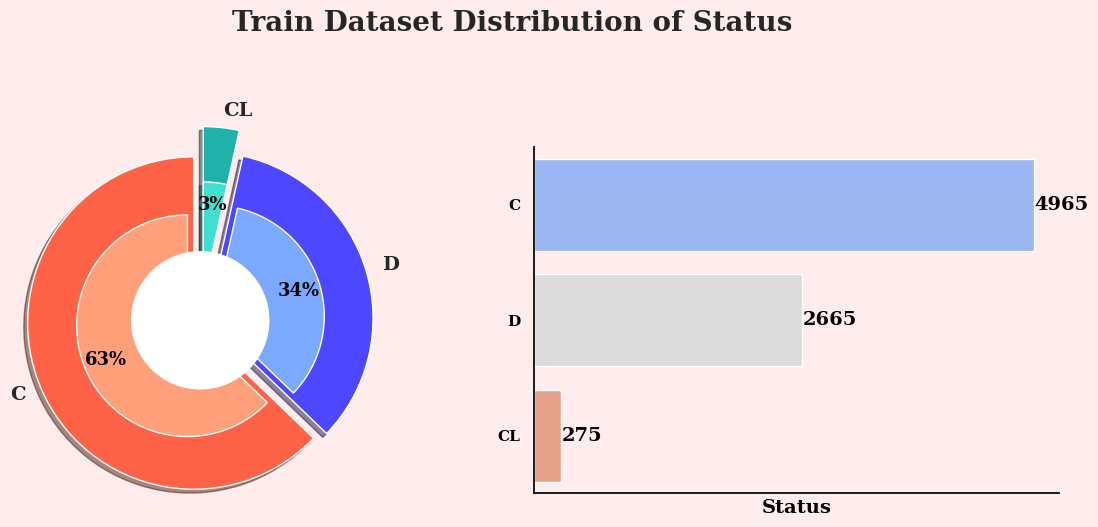

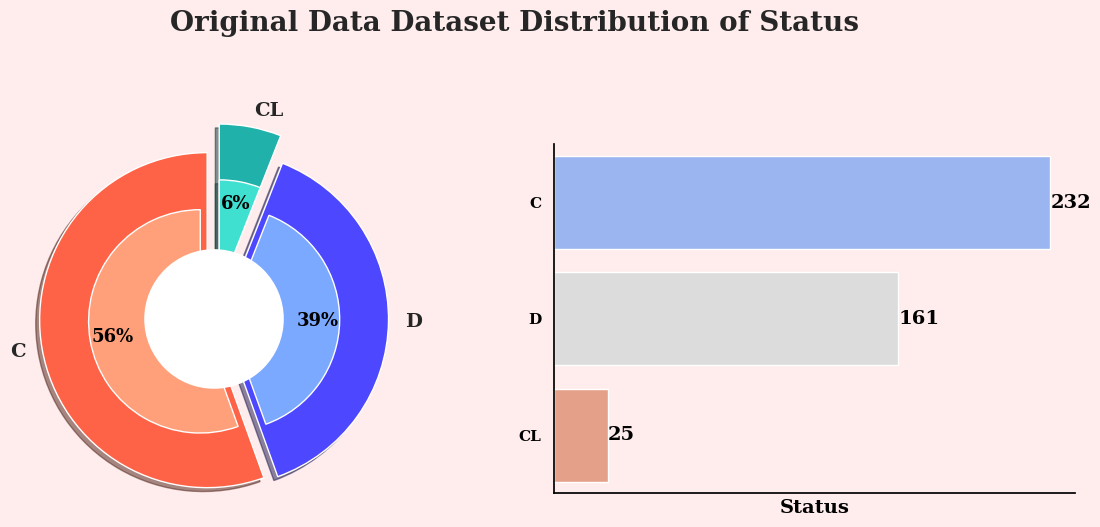

In [23]:
plot_count(train, ['Status'], 'Train')
plot_count(orig_data, ['Status'], 'Original Data')